[View in Colaboratory](https://colab.research.google.com/github/anurag-shakya/titanic_data_analysis/blob/master/dominant_color_case_study.ipynb)

In [0]:
import cv2
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
import webcolors
from google.colab import files
%matplotlib inline

In [30]:
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving 221b.jpg to 221b (2).jpg
User uploaded file "221b.jpg" with length 7742 bytes


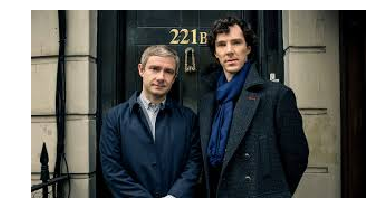

In [31]:
image = cv2.imread("221b.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image.shape

plt.figure()
plt.axis("off")
plt.imshow(image)

In [32]:
image.shape

(168, 300, 3)

In [33]:
image = image.reshape((image.shape[0] * image.shape[1], 3))
print image
print image.shape

[[150 143 124]
 [151 144 125]
 [152 145 126]
 ...
 [  1   0   0]
 [  0   0   0]
 [  0   0   0]]
(50400, 3)


In [39]:
K = 3
clf = KMeans(n_clusters=K)
clf.fit(image)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [40]:
#initialising the label dictionary
label = [0, 0, 0]

#finding count of data in each cluster
for x in clf.labels_:
    label[x] += 1

#Total Number of data points
label_sum = image.shape[0]

#converting to percentage
label = [float(x) / label_sum for x in label]
print label

[0.6402777777777777, 0.1735515873015873, 0.18617063492063493]


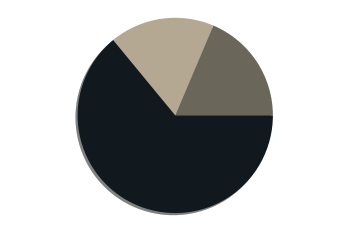

In [36]:
centroids = [x.astype("uint8").tolist() for x in clf.cluster_centers_]

clr = [webcolors.rgb_to_hex(c) for c in centroids]

plt.pie(label, colors=clr, shadow=True) 
plt.axis('equal')
plt.show()